In [7]:
import numpy as np
import pandas as pd
import requests
import json

In [17]:
# Constants
resume_api = 'https://jennjwang.pythonanywhere.com'
candidate_api = 'https://heonlee.pythonanywhere.com/'
num_entries = 1

def generate_data(num_entries):
    # Generate synthetic data with variability
    degrees = ["Bachelor's", "Master's", "PhD"]
    genders = ["F", "M", "N/A"]
    ethnicities = ['White', 'Black', 'Native American', 'Asian American & Pacific Islander', 'Other']

    data = {
        'Applicant ID': range(1, 1 + num_entries),
        'School Name': "Brown University",
        'GPA': 3.50,
        'Degree': np.random.choice(degrees, num_entries),
        'Location': "Providence",
        'Gender': np.random.choice(genders, num_entries),
        'Veteran status': 0,
        'Work authorization': 0,
        'Disability': 0,
        'Ethnicity': np.random.choice(ethnicities, num_entries),
        'Role 1': 'Financial Analyst',
        'Start 1': '2/15',
        'End 1': '9/15',
        'Role 2': 'Web Developer',
        'Start 2': '10/15',
        'End 2': '12/15',
        'Role 3': 'N/A',
        'Start 3': 'N/A',
        'End 3': 'N/A'
    }
    return pd.DataFrame(data)

def send_api_request(api_url, data):
    headers = {'Content-Type': 'application/json'}
    json_data = data.to_json(orient='records')
    response = requests.post(api_url, data=json_data, headers=headers)
    return eval(response.json()['prediction'])

def main():
    n_repeat = 4000
    generated_data = generate_data(n_repeat)
    generated_data.to_csv('generated_data.csv', index=False)

    # Send data to APIs and append scores
    predictions = send_api_request(resume_api, generated_data)
    generated_data['score'] = [float(pred['score']) for pred in predictions]

    predictions = send_api_request(candidate_api, generated_data)
    generated_data['prediction'] = [int(pred['prediction']) for pred in predictions]

    # Calculate statistics
    stats = generated_data.groupby(['Degree', 'Gender', 'Ethnicity']).agg({'prediction': ['mean', 'std']}).reset_index()
    print(stats)
    return generated_data, stats

if __name__ == "__main__":
    df, stats = main()



        Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.414141  0.495080
1   Bachelor's      F                              Black   0.500000  0.503003
2   Bachelor's      F                    Native American   0.434783  0.498445
3   Bachelor's      F                              Other   0.371795  0.486412
4   Bachelor's      F                              White   0.351648  0.480130
5   Bachelor's      M  Asian American & Pacific Islander   0.614679  0.488919
6   Bachelor's      M                              Black   0.681818  0.468440
7   Bachelor's      M                    Native American   0.554455  0.499505
8   Bachelor's      M                              Other   0.615385  0.489200
9   Bachelor's      M                              White   0.633803  0.485193
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000

In [13]:
stats

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.365385  0.483870
1   Bachelor's      F                              Black   0.338028  0.476405
2   Bachelor's      F                    Native American   0.455696  0.501216
3   Bachelor's      F                              Other   0.402597  0.493637
4   Bachelor's      F                              White   0.414634  0.495691
5   Bachelor's      M  Asian American & Pacific Islander   0.810127  0.394707
6   Bachelor's      M                              Black   0.589041  0.495413
7   Bachelor's      M                    Native American   0.608696  0.490716
8   Bachelor's      M                              Other   0.644444  0.481363
9   Bachelor's      M                              White   0.621212  0.488802
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000
15    Master's      F  Asian American & Pacific Islander   0.349057  0.478936
16    Master's      F                              Black   0.473684  0.502625
17    Master's      F                    Native American   0.288462  0.455241
18    Master's      F                              Other   0.406250  0.493710
19    Master's      F                              White   0.373832  0.486097
20    Master's      M  Asian American & Pacific Islander   0.518072  0.502711
21    Master's      M                              Black   0.576923  0.496440
22    Master's      M                    Native American   0.577320  0.496552
23    Master's      M                              Other   0.680412  0.468739
24    Master's      M                              White   0.588235  0.495074
25    Master's    N/A  Asian American & Pacific Islander   0.000000  0.000000
26    Master's    N/A                              Black   0.000000  0.000000
27    Master's    N/A                    Native American   0.000000  0.000000
28    Master's    N/A                              Other   0.000000  0.000000
29    Master's    N/A                              White   0.000000  0.000000
30         PhD      F  Asian American & Pacific Islander   0.376812  0.488137
31         PhD      F                              Black   0.364865  0.484678
32         PhD      F                    Native American   0.350000  0.479372
33         PhD      F                              Other   0.425532  0.497074
34         PhD      F                              White   0.344086  0.477644
35         PhD      M  Asian American & Pacific Islander   0.510000  0.502418
36         PhD      M                              Black   0.617021  0.488720
37         PhD      M                    Native American   0.632911  0.485091
38         PhD      M                              Other   0.744898  0.438160
39         PhD      M                              White   0.636364  0.483802
40         PhD    N/A  Asian American & Pacific Islander   0.000000  0.000000
41         PhD    N/A                              Black   0.000000  0.000000
42         PhD    N/A                    Native American   0.000000  0.000000
43         PhD    N/A                              Other   0.000000  0.000000
44         PhD    N/A                              White   0.000000  0.000000

In [15]:
stats[stats['Degree'] == "Bachelor's"]

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.365385  0.483870
1   Bachelor's      F                              Black   0.338028  0.476405
2   Bachelor's      F                    Native American   0.455696  0.501216
3   Bachelor's      F                              Other   0.402597  0.493637
4   Bachelor's      F                              White   0.414634  0.495691
5   Bachelor's      M  Asian American & Pacific Islander   0.810127  0.394707
6   Bachelor's      M                              Black   0.589041  0.495413
7   Bachelor's      M                    Native American   0.608696  0.490716
8   Bachelor's      M                              Other   0.644444  0.481363
9   Bachelor's      M                              White   0.621212  0.488802
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000

In [20]:
df.groupby(['Degree', 'Gender']).agg({'prediction': ['mean', 'std']}).reset_index()

Degree Gender prediction          
                           mean       std
0  Bachelor's      F   0.414414  0.493176
1  Bachelor's      M   0.617391  0.486553
2  Bachelor's    N/A   0.000000  0.000000
3    Master's      F   0.460000  0.498952
4    Master's      M   0.645514  0.478881
5    Master's    N/A   0.000000  0.000000
6         PhD      F   0.397408  0.489891
7         PhD      M   0.612745  0.487721
8         PhD    N/A   0.000000  0.000000

In [22]:
df.groupby(['Degree', 'Ethnicity']).agg({'prediction': ['mean', 'std']}).reset_index()

Degree                          Ethnicity prediction          
                                                        mean       std
0   Bachelor's  Asian American & Pacific Islander   0.384342  0.487307
1   Bachelor's                              Black   0.386364  0.487840
2   Bachelor's                    Native American   0.347826  0.477146
3   Bachelor's                              Other   0.321970  0.468119
4   Bachelor's                              White   0.345291  0.476533
5     Master's  Asian American & Pacific Islander   0.367589  0.483104
6     Master's                              Black   0.379195  0.486003
7     Master's                    Native American   0.357692  0.480245
8     Master's                              Other   0.354962  0.479418
9     Master's                              White   0.390071  0.488633
10         PhD  Asian American & Pacific Islander   0.366935  0.482943
11         PhD                              Black   0.322344  0.468232
12         PhD                    Native American   0.308772  0.462799
13         PhD                              Other   0.296029  0.457330
14         PhD                              White   0.334646  0.472798

Changed Start and End date

In [27]:
# Constants
resume_api = 'https://jennjwang.pythonanywhere.com'
candidate_api = 'https://heonlee.pythonanywhere.com/'
num_entries = 1

def generate_data(num_entries):
    # Generate synthetic data with variability
    degrees = ["Bachelor's", "Master's", "PhD"]
    genders = ["F", "M", "N/A"]
    ethnicities = ['White', 'Black', 'Native American', 'Asian American & Pacific Islander', 'Other']

    data = {
        'Applicant ID': range(1, 1 + num_entries),
        'School Name': "Brown University",
        'GPA': 3.50,
        'Degree': np.random.choice(degrees, num_entries),
        'Location': "Providence",
        'Gender': np.random.choice(genders, num_entries),
        'Veteran status': 0,
        'Work authorization': 0,
        'Disability': 0,
        'Ethnicity': np.random.choice(ethnicities, num_entries),
        'Role 1': 'Financial Analyst',
        'Start 1': '2/15',
        'End 1': '9/15',
        'Role 2': 'Web Developer',
        'Start 2': '10/16',
        'End 2': '12/16',
        'Role 3': 'N/A',
        'Start 3': 'N/A',
        'End 3': 'N/A'
    }
    return pd.DataFrame(data)

def send_api_request(api_url, data):
    headers = {'Content-Type': 'application/json'}
    json_data = data.to_json(orient='records')
    response = requests.post(api_url, data=json_data, headers=headers)
    return eval(response.json()['prediction'])

def main():
    n_repeat = 4000
    generated_data = generate_data(n_repeat)
    generated_data.to_csv('generated_data.csv', index=False)

    # Send data to APIs and append scores
    predictions = send_api_request(resume_api, generated_data)
    generated_data['score'] = [float(pred['score']) for pred in predictions]

    predictions = send_api_request(candidate_api, generated_data)
    generated_data['prediction'] = [int(pred['prediction']) for pred in predictions]

    # Calculate statistics
    stats2 = generated_data.groupby(['Degree', 'Gender', 'Ethnicity']).agg({'prediction': ['mean', 'std']}).reset_index()
    print(stats2)
    return generated_data, stats2

if __name__ == "__main__":
    df, stats2 = main()



        Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.387500  0.490253
1   Bachelor's      F                              Black   0.323232  0.470091
2   Bachelor's      F                    Native American   0.462366  0.501284
3   Bachelor's      F                              Other   0.341176  0.476918
4   Bachelor's      F                              White   0.367925  0.484532
5   Bachelor's      M  Asian American & Pacific Islander   0.641304  0.482246
6   Bachelor's      M                              Black   0.644231  0.481064
7   Bachelor's      M                    Native American   0.584416  0.496054
8   Bachelor's      M                              Other   0.666667  0.474137
9   Bachelor's      M                              White   0.565217  0.498445
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000

In [30]:
display(stats2)

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.387500  0.490253
1   Bachelor's      F                              Black   0.323232  0.470091
2   Bachelor's      F                    Native American   0.462366  0.501284
3   Bachelor's      F                              Other   0.341176  0.476918
4   Bachelor's      F                              White   0.367925  0.484532
5   Bachelor's      M  Asian American & Pacific Islander   0.641304  0.482246
6   Bachelor's      M                              Black   0.644231  0.481064
7   Bachelor's      M                    Native American   0.584416  0.496054
8   Bachelor's      M                              Other   0.666667  0.474137
9   Bachelor's      M                              White   0.565217  0.498445
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000
15    Master's      F  Asian American & Pacific Islander   0.434783  0.498445
16    Master's      F                              Black   0.306122  0.463251
17    Master's      F                    Native American   0.386667  0.490266
18    Master's      F                              Other   0.413043  0.495079
19    Master's      F                              White   0.448276  0.500200
20    Master's      M  Asian American & Pacific Islander   0.492308  0.503831
21    Master's      M                              Black   0.717647  0.452816
22    Master's      M                    Native American   0.654321  0.478552
23    Master's      M                              Other   0.660000  0.476095
24    Master's      M                              White   0.659341  0.476557
25    Master's    N/A  Asian American & Pacific Islander   0.000000  0.000000
26    Master's    N/A                              Black   0.000000  0.000000
27    Master's    N/A                    Native American   0.000000  0.000000
28    Master's    N/A                              Other   0.000000  0.000000
29    Master's    N/A                              White   0.000000  0.000000
30         PhD      F  Asian American & Pacific Islander   0.435294  0.498738
31         PhD      F                              Black   0.440860  0.499181
32         PhD      F                    Native American   0.411765  0.495074
33         PhD      F                              Other   0.342466  0.477818
34         PhD      F                              White   0.408451  0.495046
35         PhD      M  Asian American & Pacific Islander   0.580645  0.496128
36         PhD      M                              Black   0.608696  0.490716
37         PhD      M                    Native American   0.555556  0.500000
38         PhD      M                              Other   0.677778  0.469946
39         PhD      M                              White   0.614458  0.489682
40         PhD    N/A  Asian American & Pacific Islander   0.000000  0.000000
41         PhD    N/A                              Black   0.000000  0.000000
42         PhD    N/A                    Native American   0.000000  0.000000
43         PhD    N/A                              Other   0.000000  0.000000
44         PhD    N/A                              White   0.000000  0.000000

In [31]:
display(stats), display(stats2)

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.384615  0.489653
1   Bachelor's      F                              Black   0.385417  0.489248
2   Bachelor's      F                    Native American   0.405063  0.494041
3   Bachelor's      F                              Other   0.432990  0.498063
4   Bachelor's      F                              White   0.462366  0.501284
5   Bachelor's      M  Asian American & Pacific Islander   0.540000  0.500908
6   Bachelor's      M                              Black   0.643678  0.481688
7   Bachelor's      M                    Native American   0.539216  0.500921
8   Bachelor's      M                              Other   0.544304  0.501216
9   Bachelor's      M                              White   0.550000  0.500000
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000
15    Master's      F  Asian American & Pacific Islander   0.450549  0.500305
16    Master's      F                              Black   0.433735  0.498602
17    Master's      F                    Native American   0.384615  0.489200
18    Master's      F                              Other   0.440476  0.499426
19    Master's      F                              White   0.394231  0.491051
20    Master's      M  Asian American & Pacific Islander   0.655556  0.477849
21    Master's      M                              Black   0.682353  0.468324
22    Master's      M                    Native American   0.544304  0.501216
23    Master's      M                              Other   0.552632  0.500526
24    Master's      M                              White   0.593407  0.493919
25    Master's    N/A  Asian American & Pacific Islander   0.000000  0.000000
26    Master's    N/A                              Black   0.000000  0.000000
27    Master's    N/A                    Native American   0.000000  0.000000
28    Master's    N/A                              Other   0.000000  0.000000
29    Master's    N/A                              White   0.000000  0.000000
30         PhD      F  Asian American & Pacific Islander   0.390244  0.490807
31         PhD      F                              Black   0.294118  0.457895
32         PhD      F                    Native American   0.317073  0.468200
33         PhD      F                              Other   0.441558  0.499829
34         PhD      F                              White   0.354430  0.481397
35         PhD      M  Asian American & Pacific Islander   0.617021  0.488720
36         PhD      M                              Black   0.632911  0.485091
37         PhD      M                    Native American   0.666667  0.474045
38         PhD      M                              Other   0.623529  0.487376
39         PhD      M                              White   0.659574  0.476393
40         PhD    N/A  Asian American & Pacific Islander   0.000000  0.000000
41         PhD    N/A                              Black   0.000000  0.000000
42         PhD    N/A                    Native American   0.000000  0.000000
43         PhD    N/A                              Other   0.000000  0.000000
44         PhD    N/A                              White   0.000000  0.000000

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.387500  0.490253
1   Bachelor's      F                              Black   0.323232  0.470091
2   Bachelor's      F                    Native American   0.462366  0.501284
3   Bachelor's      F                              Other   0.341176  0.476918
4   Bachelor's      F                              White   0.367925  0.484532
5   Bachelor's      M  Asian American & Pacific Islander   0.641304  0.482246
6   Bachelor's      M                              Black   0.644231  0.481064
7   Bachelor's      M                    Native American   0.584416  0.496054
8   Bachelor's      M                              Other   0.666667  0.474137
9   Bachelor's      M                              White   0.565217  0.498445
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000
15    Master's      F  Asian American & Pacific Islander   0.434783  0.498445
16    Master's      F                              Black   0.306122  0.463251
17    Master's      F                    Native American   0.386667  0.490266
18    Master's      F                              Other   0.413043  0.495079
19    Master's      F                              White   0.448276  0.500200
20    Master's      M  Asian American & Pacific Islander   0.492308  0.503831
21    Master's      M                              Black   0.717647  0.452816
22    Master's      M                    Native American   0.654321  0.478552
23    Master's      M                              Other   0.660000  0.476095
24    Master's      M                              White   0.659341  0.476557
25    Master's    N/A  Asian American & Pacific Islander   0.000000  0.000000
26    Master's    N/A                              Black   0.000000  0.000000
27    Master's    N/A                    Native American   0.000000  0.000000
28    Master's    N/A                              Other   0.000000  0.000000
29    Master's    N/A                              White   0.000000  0.000000
30         PhD      F  Asian American & Pacific Islander   0.435294  0.498738
31         PhD      F                              Black   0.440860  0.499181
32         PhD      F                    Native American   0.411765  0.495074
33         PhD      F                              Other   0.342466  0.477818
34         PhD      F                              White   0.408451  0.495046
35         PhD      M  Asian American & Pacific Islander   0.580645  0.496128
36         PhD      M                              Black   0.608696  0.490716
37         PhD      M                    Native American   0.555556  0.500000
38         PhD      M                              Other   0.677778  0.469946
39         PhD      M                              White   0.614458  0.489682
40         PhD    N/A  Asian American & Pacific Islander   0.000000  0.000000
41         PhD    N/A                              Black   0.000000  0.000000
42         PhD    N/A                    Native American   0.000000  0.000000
43         PhD    N/A                              Other   0.000000  0.000000
44         PhD    N/A                              White   0.000000  0.000000

(None, None)

In [32]:
df.groupby(['Degree', 'Gender']).agg({'prediction': ['mean', 'std']}).reset_index()

Degree Gender prediction          
                           mean       std
0  Bachelor's      F   0.375810  0.484855
1  Bachelor's      M   0.621681  0.485505
2  Bachelor's    N/A   0.000000  0.000000
3    Master's      F   0.396396  0.489700
4    Master's      M   0.644550  0.479218
5    Master's    N/A   0.000000  0.000000
6         PhD      F   0.410319  0.492497
7         PhD      M   0.608200  0.488709
8         PhD    N/A   0.000000  0.000000

Call-back Rate results

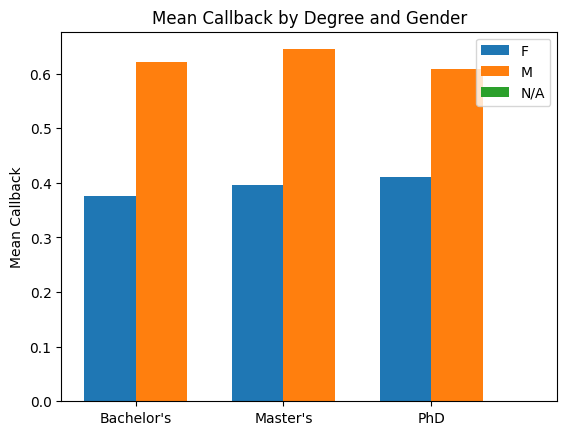

<Figure size 640x480 with 0 Axes>

In [38]:
results = pd.DataFrame(df.groupby(['Degree', 'Gender']).agg({'prediction': ['mean', 'std']}).reset_index())

plot_df = pd.DataFrame({'Degree': results['Degree'],
                       'Gender': results['Gender'],
                       'mean_callback': results['prediction']['mean']})

# List of unique degrees
degrees = plot_df['Degree'].unique()

# List of unique genders
genders = plot_df['Gender'].unique()

# Generating positions for the bars
x = np.arange(len(degrees))

# Width of each bar
width = 0.35

# Plotting
fig, ax = plt.subplots()
for i, gender in enumerate(genders):
    mean_vals = plot_df[plot_df['Gender'] == gender]['mean_callback']
    ax.bar(x + i*width, mean_vals, width, label=gender)

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Mean Callback')
ax.set_title('Mean Callback by Degree and Gender')
ax.set_xticks(x + width/2)
ax.set_xticklabels(degrees)
ax.legend()

# Adding labels to each bar
for i, degree in enumerate(degrees):
    for j, gender in enumerate(genders):
        mean_val = plot_df[(plot_df['Degree'] == degree) & (plot_df['Gender'] == gender)]['mean_callback'].iloc[0]
        # plt.text(i + (j-0.5)*width, mean_val+0.5, str(mean_val), ha='center')

plt.show()
plt.savefig("results_graph")

In [39]:
df.to_csv("generated_data.csv")

Proving Resume score is uniformly distributed

In [34]:
generated_data = pd.read_csv('generated_data.csv')
generated_data['score'].describe()

count    4000.000000
mean        5.081960
std         2.896805
min         0.000000
25%         2.560000
50%         5.065000
75%         7.640000
max        10.000000
Name: score, dtype: float64

(array([372., 388., 404., 400., 416., 390., 378., 404., 405., 443.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

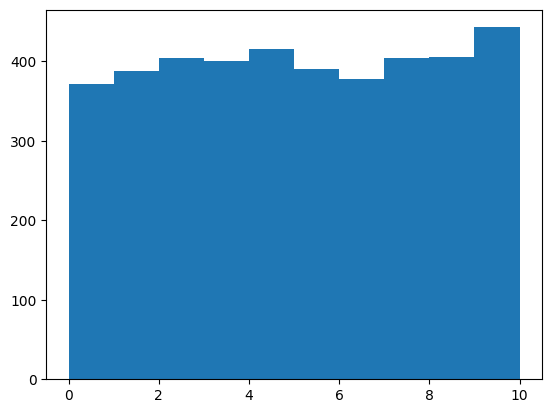

In [36]:
import matplotlib.pyplot as plt

plt.hist(generated_data['score'])

Fairness Metrics

In [41]:
def di(sensitive_attribute, dataset, predicted_labels, majority_class, minority_class):
    """
    Calculate the Disparate Impact (DI) between majority and minority classes based on predicted labels.

    Parameters:
    - sensitive_attribute (str): Name of the column representing the sensitive attribute.
    - dataset (pd.DataFrame): The dataset containing the sensitive attribute and true outcome variable.
    - predicted_labels (pd.Series): Predicted labels for the outcome variable.
    - majority_class: Value representing the majority class in the sensitive attribute.
    - minority_class: Value representing the minority class in the sensitive attribute.

    Returns:
    - di (float): Disparate Impact between majority and minority classes.
    """
    # TODO: Compute the DI value
    prob_majority_positive = np.mean(predicted_labels[dataset[sensitive_attribute] == majority_class])
    prob_minority_positive = np.mean(predicted_labels[dataset[sensitive_attribute] == minority_class])

    # Compute SPD
    di_val = prob_minority_positive / prob_majority_positive
    return di_val

In [42]:
def spd(sensitive_attribute, dataset, predicted_labels, majority_class, minority_class):
    """
    Calculate the Statistical Parity Difference (SPD) between majority and minority classes based on predicted labels.

    Parameters:
    - sensitive_attribute (str): Name of the column representing the sensitive attribute.
    - dataset (pd.DataFrame): The dataset containing the sensitive attribute and true outcome variable.
    - predicted_labels (pd.Series): Predicted labels for the outcome variable.
    - majority_class: Value representing the majority class in the sensitive attribute.
    - minority_class: Value representing the minority class in the sensitive attribute.

    Returns:
    - spd (float): Statistical Parity Difference between majority and minority classes.
    """
    # TODO: Compute the spd value
    prob_majority_positive = np.mean(predicted_labels[dataset[sensitive_attribute] == majority_class])
    prob_minority_positive = np.mean(predicted_labels[dataset[sensitive_attribute] == minority_class])

    # Compute SPD
    spd_val = prob_minority_positive - prob_majority_positive
    return spd_val

In [43]:
di_val = di('Gender',df,df['prediction'],'M','F')
spd_val = spd('Gender',df,df['prediction'],'M','F')

print('Disparate Impact (DI) between Female and Male candidates :', di_val)
print('Statistical Parity Difference (SPD) between Female and Male candidates :', spd_val)

Disparate Impact (DI) between Female and Male candidates : 0.6300079815866653
Statistical Parity Difference (SPD) between Female and Male candidates : -0.2310688919260735


In [44]:
di_val = di('Ethnicity',df,df['prediction'],'White','Black')
spd_val = spd('Ethnicity',df,df['prediction'],'White','Black')

print('Disparate Impact (DI) between White and Black candidates :', di_val)
print('Statistical Parity Difference (SPD) between White and Black candidates :', spd_val)

Disparate Impact (DI) between White and Black candidates : 0.957515097765953
Statistical Parity Difference (SPD) between White and Black candidates : -0.014520156459737588


In [45]:
di_val = di('Ethnicity',df,df['prediction'],'White','Asian American & Pacific Islander')
spd_val = spd('Ethnicity',df,df['prediction'],'White','Asian American & Pacific Islander')

print('Disparate Impact (DI) between White and Asian American & Pacific Islander candidates :', di_val)
print('Statistical Parity Difference (SPD) between White and Asian American & Pacific Islander candidates :', spd_val)

Disparate Impact (DI) between White and Asian American & Pacific Islander candidates : 0.9613756613756614
Statistical Parity Difference (SPD) between White and Asian American & Pacific Islander candidates : -0.013200723327305597


In [46]:
di_val = di('Ethnicity',df,df['prediction'],'White','Native American')
spd_val = spd('Ethnicity',df,df['prediction'],'White','Native American')

print('Disparate Impact (DI) between White and Native American candidates :', di_val)
print('Statistical Parity Difference (SPD) between White and Native American candidates :', spd_val)

Disparate Impact (DI) between White and Native American candidates : 0.9438470728793309
Statistical Parity Difference (SPD) between White and Native American candidates : -0.019191506737443853


In [47]:
di_val = di('Ethnicity',df,df['prediction'],'White','Other')
spd_val = spd('Ethnicity',df,df['prediction'],'White','Other')

print('Disparate Impact (DI) between White and Other candidates :', di_val)
print('Statistical Parity Difference (SPD) between White and Other candidates :', spd_val)

Disparate Impact (DI) between White and Other candidates : 1.0285297988343676
Statistical Parity Difference (SPD) between White and Other candidates : 0.009750690740859769


In [49]:
di_val = di('Ethnicity',df,df['prediction'],'Asian American & Pacific Islander','Black')
spd_val = spd('Ethnicity',df,df['prediction'],'Asian American & Pacific Islander','Black')

print('Disparate Impact (DI) between Asian American & Pacific Islander and Black candidates :', di_val)
print('Statistical Parity Difference (SPD) between Asian American & Pacific Islander and Black candidates :', spd_val)

Disparate Impact (DI) between Asian American & Pacific Islander and Black candidates : 0.9959843339447721
Statistical Parity Difference (SPD) between Asian American & Pacific Islander and Black candidates : -0.0013194331324319908


In [51]:
results_df = pd.DataFrame({"Majority Group": ['Male', 'White', 'White', 'White', 'White','Asian American & Pacific Islander'],
                           "Minority Group": ['Female', 'Black', 'Asian American & Pacific Islander', 'Native American', 'Other', 'Black'],
                           "Disparate Impact": [0.63, 0.95, 0.96, 0.94, 1.02, 0.99],
                           "Statistical Parity Difference": [-0.23, -0.01, -0.01, -0.01, 0.00, 0.01]})

In [52]:
results_df

,Majority Group,Minority Group,Disparate Impact,Statistical Parity Difference
0,Male,Female,0.63,-0.23
1,White,Black,0.95,-0.01
2,White,Asian American & Pacific Islander,0.96,-0.01
3,White,Native American,0.94,-0.01
4,White,Other,1.02,0.00
5,Asian American & Pacific Islander,Black,0.99,0.01
